<a href="https://colab.research.google.com/github/Hitendra213/Plant_leaf_pridictor/blob/main/Leaf_pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from google.colab import drive
from google.colab import files
import os

In [41]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Define paths
data_dir = '/content/drive/MyDrive/03'  # Path to your dataset folder
class_names = ['1', '2', '3', '4', '5']  # Your class names
img_size = (32, 32)  # Image size for resizing
batch_size = 32

In [43]:
# Data augmentation for better generalization
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Random rotation up to 20 degrees
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,  # Random shear transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    validation_split=0.2  # 80% train, 20% validation
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',  # For integer labels
    subset='training'  # Use training subset
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',  # For integer labels
    subset='validation'  # Use validation subset
)

Found 4064 images belonging to 5 classes.
Found 1014 images belonging to 5 classes.


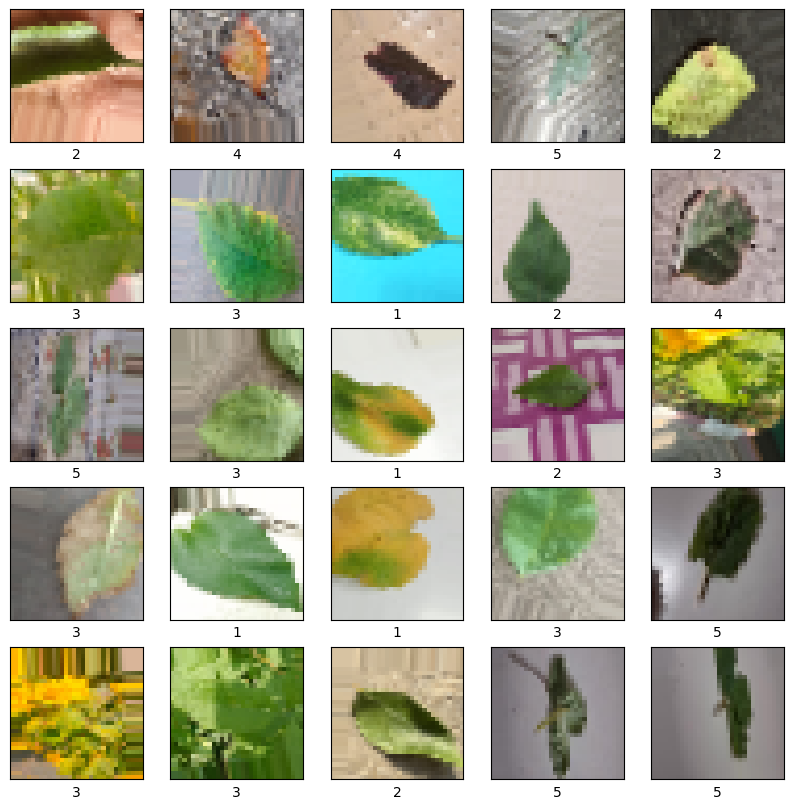

In [44]:
# Visualize some images from the dataset
plt.figure(figsize=(10, 10))
images, labels = next(train_generator)  # Get a batch of images and labels
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])  # Hide x-axis ticks
    plt.yticks([])  # Hide y-axis ticks
    plt.grid(False)  # Disable grid
    plt.imshow(images[i])  # Display image
    plt.xlabel(class_names[int(labels[i])])  # Show class name
plt.show()

In [45]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout to prevent overfitting
    layers.Dense(5)  # 5 classes
])

# Model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,453 (626.77 KB)

 Trainable params: 160,005 (625.02 KB)

 Non-trainable params: 448 (1.75 KB)

In [46]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [47]:
# Train the model
history = model.fit(
    train_generator,
    epochs=50,  # Increased epochs for better training
    validation_data=validation_generator
)

Epoch 1/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 272ms/step - accuracy: 0.5548 - loss: 1.3586 - val_accuracy: 0.2071 - val_loss: 2.9679
Epoch 2/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 29s 231ms/step - accuracy: 0.7720 - loss: 0.6084 - val_accuracy: 0.4675 - val_loss: 2.7072
Epoch 3/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 30s 237ms/step - accuracy: 0.7905 - loss: 0.5637 - val_accuracy: 0.4892 - val_loss: 2.1930
Epoch 4/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 225ms/step - accuracy: 0.8333 - loss: 0.4464 - val_accuracy: 0.6943 - val_loss: 1.0071
Epoch 5/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 226ms/step - accuracy: 0.8553 - loss: 0.3611 - val_accuracy: 0.6351 - val_loss: 1.1879
Epoch 6/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 29s 225ms/step - accuracy: 0.8504 - loss: 0.3947 - val_accuracy: 0.7722 - val_loss: 0.6898
Epoch 7/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 29s 225ms/step - accuracy: 0.8761 - loss: 0.3348 - val_accuracy: 0.7308 - val_loss: 0.7631
Epoch 8/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 28s 224ms/step - accuracy: 0.8912 - loss: 0

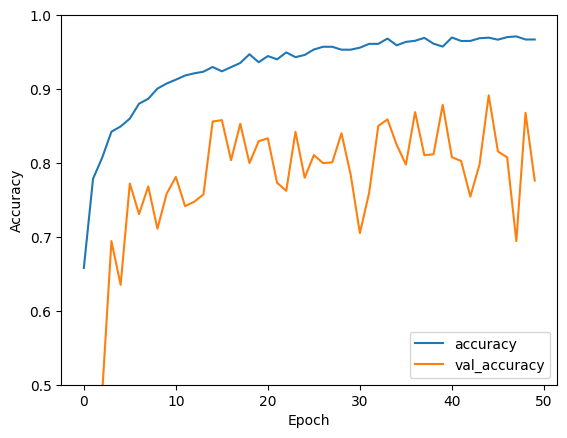

In [48]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])  # Set y-axis limits
plt.legend(loc='lower right')
plt.show()

In [49]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print(f"Validation Accuracy: {test_acc}")

32/32 - 5s - 171ms/step - accuracy: 0.7574 - loss: 1.1008
Validation Accuracy: 0.7573964595794678


In [50]:
# Function to preprocess a single image
def preprocess_image(image_path):
    image = Image.open(image_path).resize(img_size)
    image = np.array(image) / 255.0  # Normalize
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

In [51]:
# Function to predict the label of an uploaded image with "other" class detection
def predict_image_label(image_path, confidence_threshold=0.7):
    image = preprocess_image(image_path)
    predictions = model.predict(image)
    max_prob = np.max(tf.nn.softmax(predictions))  # Convert logits to probabilities
    predicted_class_index = np.argmax(predictions)
    if max_prob < confidence_threshold:
        return "other"  # Classify as "other" if confidence is below threshold
    return class_names[predicted_class_index]

In [55]:
# Upload and predict image with "other" class handling
uploaded = files.upload()
for file_name in uploaded.keys():
    predicted_label = predict_image_label(file_name)
    print(f"Predicted Label for {file_name}: {predicted_label}")

Saving 20250122_111618.jpg to 20250122_111618 (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Label for 20250122_111618 (2).jpg: 4
